In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from functools import partial

In [4]:
from dotenv import load_dotenv

from pathlib import Path

env_path = Path("../../.env-live")

if env_path.exists():
    print('envs Loaded')
    load_dotenv(dotenv_path=env_path)
from jrjModelRegistry.jrjModelRegistry import registerAJrjModel

envs Loaded
Pinged your deployment. You successfully connected to MongoDB!


In [5]:
def generalDtPredictor(self, transformedData):
    import pandas as pd
    probs = self.predict_proba(transformedData)
    return pd.Series(probs[:, 1])

In [6]:
def generalDtTransformer(dataForTransfer = None):
    import pandas as pd
    if isinstance(dataForTransfer, pd.DataFrame):
        df = dataForTransfer.copy()
    else:
        df = pd.DataFrame(dataForTransfer)
    return df

In [7]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [8]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [9]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [10]:
hDSampleData = {
    "age": [70],
    "sex": [1],
    "BP": [130],
    "cholestrol": [322],
}
hDSampleData

{'age': [70], 'sex': [1], 'BP': [130], 'cholestrol': [322]}

In [11]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(generalDtTransformer(X_train), y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
# !pip install six

In [17]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

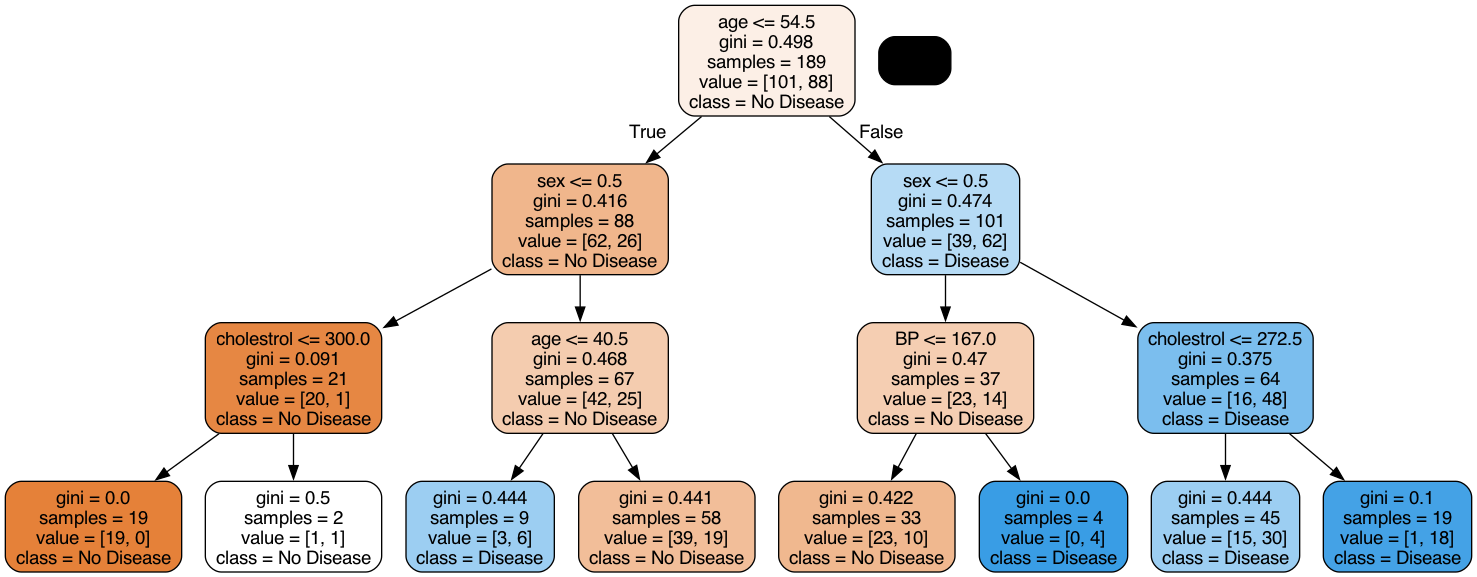

In [18]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
# Image(graph.create_png(),width=800,height=900)
# graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [19]:
y_train_pred = dt.predict(generalDtTransformer(X_train))
y_test_pred = dt.predict(generalDtTransformer(X_test))
y_test_pred_probs = dt.predict_proba(generalDtTransformer(X_test))

In [20]:
y_test_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [21]:
y_test_pred_probs

array([[0.33333333, 0.66666667],
       [0.67241379, 0.32758621],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.6969697 , 0.3030303 ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.6969697 , 0.3030303 ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.5       , 0.5       ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.67241379, 0.32758621],
       [0.6969697 , 0.3030303 ],
       [0.67241379, 0.32758621],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.67241379, 0.32758621],
       [0.67241379, 0.32758621],
       [0.67241379, 0.32758621],
       [0.67241379, 0.32758621],
       [0.6969697 , 0.3030303 ],
       [0.67241379, 0.32758621],
       [0.05263158, 0.94736842],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [24]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

In [25]:
dt.predict_proba(generalDtTransformer(hDSampleData))

array([[0.05263158, 0.94736842]])

In [26]:
dt.transformer = generalDtTransformer
dt.mainPredictor = partial(generalDtPredictor, dt)

In [27]:
dt.mainPredictor(dt.transformer(hDSampleData))

0    0.947368
dtype: float64

In [28]:
from sklearn.metrics import accuracy_score, classification_report
import json

In [29]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [30]:
y_pred = dt.predict(generalDtTransformer(X_test))
# y_pred
score = accuracy_score(y_test, y_pred)
# score
report = classification_report(y_test, y_pred, output_dict=True)
# report

In [31]:
decision_tree_metadata = {
    "modelName": "dTModel1",
    "version": "1.0.1",
    "params": dt.get_params(),  # All model hyperparameters
    "score": float(score),         # Accuracy
    "modelLibrary": "sklearn.tree.DecisionTreeClassifier",
    "libraryMetadata": {
        "feature_importances": dt.feature_importances_.tolist(),
        "n_features": int(dt.n_features_in_),
        "n_classes": int(dt.n_classes_),
        "classes": dt.classes_.tolist(),
        "depth": int(dt.get_depth()),
        "n_leaves": int(dt.get_n_leaves()),
        "classification_report": report
    },
     "sampleData": {
        "dataForTransfer": hDSampleData
    }
}

In [32]:
registerAJrjModel(
    dt,
    decision_tree_metadata
)

✅ Uploaded encrypted ZIP to s3://jasonjafariml/dTModel1__1.0.1.pkl.zip


{'_id': '68553af9a1c7cffcce82968b',
 'modelName': 'dTModel1',
 'version': '1.0.1',
 'params': {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'random_state': None,
  'splitter': 'best'},
 'score': 0.6049382716049383,
 'modelLibrary': 'sklearn.tree.DecisionTreeClassifier',
 'libraryMetadata': {'feature_importances': [0.4094009169839831,
   0.35652876012026785,
   0.12527576387474865,
   0.1087945590210004],
  'n_features': 4,
  'n_classes': 2,
  'classes': [0, 1],
  'depth': 3,
  'n_leaves': 8,
  'classification_report': {'0': {'precision': 0.660377358490566,
    'recall': 0.7142857142857143,
    'f1-score': 0.6862745098039216,
    'support': 49.0},
   '1': {'precision': 0.5,
    'recall': 0.4375,
    'f1-score': 0.4666666666666667,
    'support': 32.0},
   'a